# Polynomial regression 

The example belows uses a temperature-energy dataset in order to illustrate how to perform a non linear regression.

Workflow:
1. Preparation
    - Extract the dataset from the _power_demand_vs_temperature.csv_ 
    - Explore the dataset and check for missing values
    - Plot the distribution
    - Divide the dataset into train and test 
    - Create an evaluation function
2. First experiment
    - Create a linear model 
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
3. Second experiment
    - Create a polynomial regression model with degree 2
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
4. Third experiment
    - repeat the steps done in the second experiment but with degree 3
5. Third experiment
    - repeat the steps done in the second experiment but with degree 4
6. Compare the evaluation of each model


In [34]:
# Code source: Filippo Orazi 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

random_state = 42 # this will be used to guarantee the repeatability of the experiment

## Dataset preparation

### Load the dataset from a `.csv` file
This cell allows full compatibility between execution in Google Colab and in local


In [35]:
try:
  import google.colab.files
  IN_COLAB = True
except:
  IN_COLAB = False
# from google.colab import files
if IN_COLAB:
    uploaded = files.upload()


The file must be available in the same directory, or uploaded in the Colab environment in the execution of the previous cell


Set the date column as index

In [36]:
df=pd.read_csv("power_demand_vs_temperature.csv")
df.index=df["date"]
df=df.drop("date", axis=1)
df.head()

,demand,temp
date,,
2015-01-01,1.736065,1.7
2015-01-02,1.831672,2.2
2015-01-03,1.714934,14.4
2015-01-04,1.628577,15.6
2015-01-05,2.045394,0.0


### Explore the dataset and check for missing values


In [37]:
df.describe()

,demand,temp
count,1096.000000,1096.000000
mean,1.831796,16.927737
std,0.329434,10.791581
min,1.316033,-15.000000
25%,1.581654,8.900000
50%,1.731479,18.900000
75%,2.024869,26.100000
max,2.804025,33.900000


In [38]:
print(f"the dataset has {df.shape[0] - df.dropna().shape[0]} missing values" )

the dataset has 0 missing values


### Create X and y 

In [39]:
y=df["demand"]
X=df.drop("demand", axis=1)
print("X:",X.shape)
print("y:", y.shape)

X: (1096, 1)
y: (1096,)


### Plot the distribution



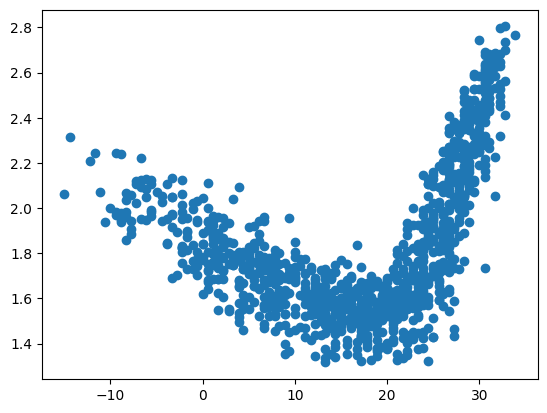

In [40]:
plt.plot(X,y, "o")

### Divide the dataset in train and test splits

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, random_state=random_state)
print(X_train.shape[0], "and", y_test.shape[0])

767 and 329


### Create an evaluation function to compute, print and return the metrics: rmse r2 f-statistic and p-value

In [42]:
# Computation of F-statistic and p-value for the regression
# http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm
def f_test(y_true, y_pred, n_var, n_obs, sn=0.95):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    n = n_obs
    p = n_var+1 # number of regression parameters (coefficients + intercept)
    y_true_m = np.mean(y_true)
    SSM = np.sum((y_pred-y_true_m)**2)
    SST = np.sum((y_true-y_true_m)**2)
    SSE = np.sum((y_true-y_pred)**2)
    DFT = n - 1
    DFM = p - 1 # degrees of freedom for model - numerator
    DFE = n - p # degrees of freedom for error - denominator
    DFT = n - 1
    MSM = SSM / DFM
    MSE = SSE / DFE 
    MST = SST / DFT
    F = MSM / MSE
    p = 1-scipy.stats.f.cdf(F, DFM, DFE) #find p-value of F test statistic 
    return F, p   
def print_eval(X, y, model):
    pred = model.predict(X)
    F, p = f_test(y, pred, X.shape[1], X.shape[0])
    print(" Mean squared error: \t{:.5}".format(mean_squared_error(y,pred)))
    print(" r2 score: \t\t{:.5}".format(r2_score(y,pred)))
    print(" f-statistic: \t\t{:.5}".format(F))
    print(" p-value: \t\t{:.5}".format(p))
    return mean_squared_error(pred, y), r2_score(pred, y), F, p


## First experiment
Create a linear model 

Train the model on X_train and y_train 

Evaluate the model on X_test and y_test


In [43]:
from sklearn import linear_model
l_model= linear_model.LinearRegression()
l_model.fit(X_train,y_train)
y_pred_l=l_model.predict(X_test)

lin=print_eval(X_test,y_test, l_model)

 Mean squared error: 	0.10165
 r2 score: 		0.16809
 f-statistic: 		44.576
 p-value: 		1.0503e-10


#### Visualize the prediction of the model 

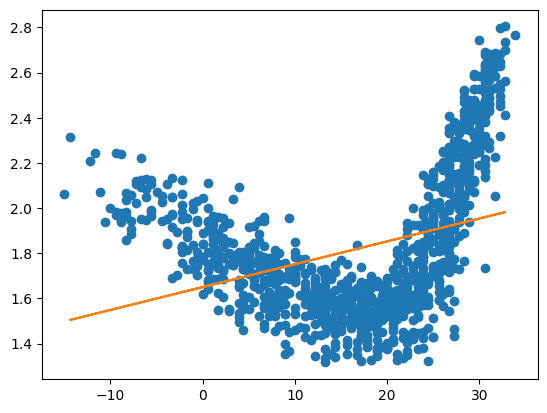

In [44]:
plt.plot(X, y, "o")
plt.plot(X_test,y_pred_l)

## Second experiment - Polynomial regression
We can clearly see that the linear regression model cannot really approximate the data distribution.

We can now try with a non linear regression model:
1. Use the sklearn fucntion _PolynomialFeature_ to create a new array of features. Set _degree=2_ and _include_bias=False_
2. Train a Linear regression model with the new features
3. Evaluate the model 
4. Visualize the predicted values of the model

#### Polynomial degree = 2

In [45]:
features=PolynomialFeatures(degree=2, include_bias=False)
X_poly=features.fit_transform(X_train)
p_model=LinearRegression()
p_model.fit(X_poly, y_train)
print()


In [46]:

y_pred_p=p_model.predict(features.transform(X_test))

pol2=print_eval(features.transform(X_test), y_test, p_model)
print()

 Mean squared error: 	0.033456
 r2 score: 		0.72619
 f-statistic: 		384.89
 p-value: 		1.1102e-16



/home/danielenapo/.local/lib/python3.11/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


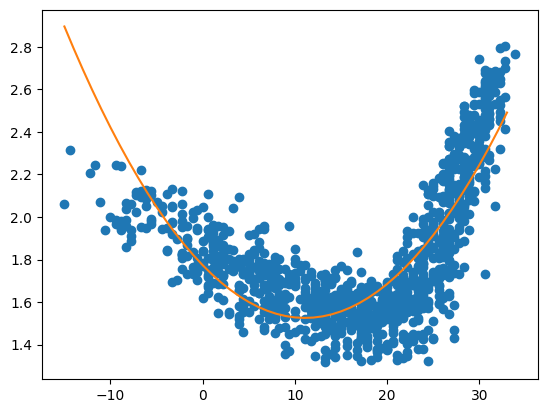

In [47]:
plt.plot(X,y, "o")
pred = p_model.predict(features.transform((np.arange(min(X.temp), max(X.temp))).reshape(-1,1)))
plt.plot(np.arange(min(X.temp), max(X.temp)), pred)

## Third experiment

#### Polynomial degree = 3

In [48]:
features3=PolynomialFeatures(degree=3, include_bias=False)
X_poly3=features3.fit_transform(X_train)
p3_model=LinearRegression()
p3_model.fit(X_poly3, y_train)
print()


In [49]:
y_pred_p3=p3_model.predict(features3.transform(X_test))

pol3=print_eval(features3.transform(X_test), y_test, p3_model)
print()

 Mean squared error: 	0.021749
 r2 score: 		0.822
 f-statistic: 		502.32
 p-value: 		1.1102e-16



/home/danielenapo/.local/lib/python3.11/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


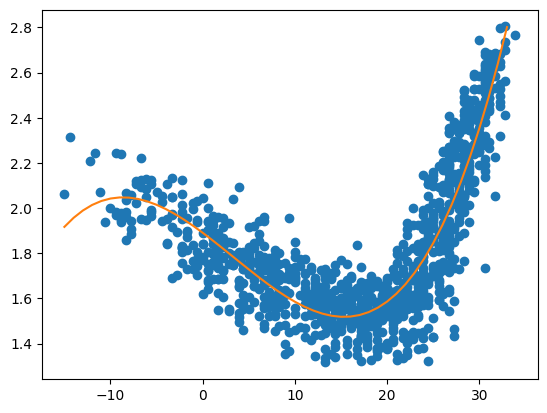

In [50]:
plt.plot(X,y, "o")
pred3 = p3_model.predict(features3.transform((np.arange(min(X.temp), max(X.temp))).reshape(-1,1)))
plt.plot(np.arange(min(X.temp), max(X.temp)), pred3)

## Fourth experiment
### Polynomial degree = 4

In [51]:

features4=PolynomialFeatures(degree=4, include_bias=False)
X_poly4=features4.fit_transform(X_train)
p4_model=LinearRegression()
p4_model.fit(X_poly4, y_train)
print()


In [52]:
y_pred_p4=p4_model.predict(features4.transform(X_test))

pol4=print_eval(features4.transform(X_test), y_test, p4_model)
print()

 Mean squared error: 	0.021334
 r2 score: 		0.8254
 f-statistic: 		390.05
 p-value: 		1.1102e-16



/home/danielenapo/.local/lib/python3.11/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


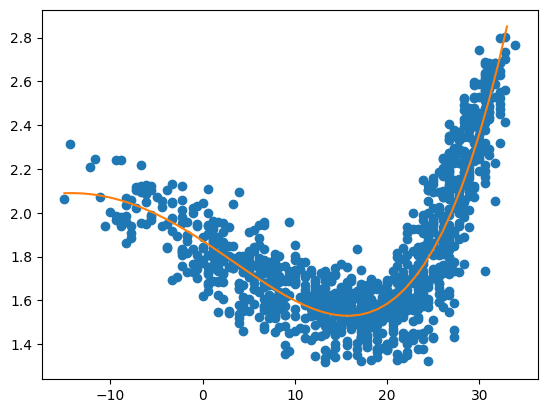

In [53]:
plt.plot(X,y, "o")
pred4 = p4_model.predict(features4.transform((np.arange(min(X.temp), max(X.temp))).reshape(-1,1)))
plt.plot(np.arange(min(X.temp), max(X.temp)), pred4)

## Compare the performance of the four models

In [54]:
performance = {"linear ": [*lin],
                "polynomial d = 2": [*pol2],
                "polynomial d = 3": [*pol3],
                "polynomial d = 4": [*pol4] }
res = pd.DataFrame(performance, index = ['rmse'
                     , 'r2'
                     , 'f-statistic' 
                     , 'p-value'])
res

,linear,polynomial d = 2,polynomial d = 3,polynomial d = 4
rmse,1.016508e-01,3.345625e-02,2.174942e-02,2.133387e-02
r2,-7.031040e+00,5.756325e-01,7.843318e-01,7.923317e-01
f-statistic,4.457638e+01,3.848865e+02,5.023183e+02,3.900454e+02
p-value,1.050272e-10,1.110223e-16,1.110223e-16,1.110223e-16
